## AdaBoosting, Gradientboosting, XGBoosting Regressor

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

plt.rcParams["figure.figsize"] = (7,4)
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)

In [2]:
df=pd.read_csv("car_dataset.csv")
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [3]:
df.shape

(301, 9)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
df.isnull().any().any()

False

In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,301.0,2013.627907,2.891554,2003.00,2012.0,2014.0,2016.0,2018.0
Selling_Price,301.0,4.661296,5.082812,0.10,0.9,3.6,6.0,35.0
Present_Price,301.0,7.628472,8.644115,0.32,1.2,6.4,9.9,92.6
Kms_Driven,301.0,36947.205980,38886.883882,500.00,15000.0,32000.0,48767.0,500000.0
Owner,301.0,0.043189,0.247915,0.00,0.0,0.0,0.0,3.0


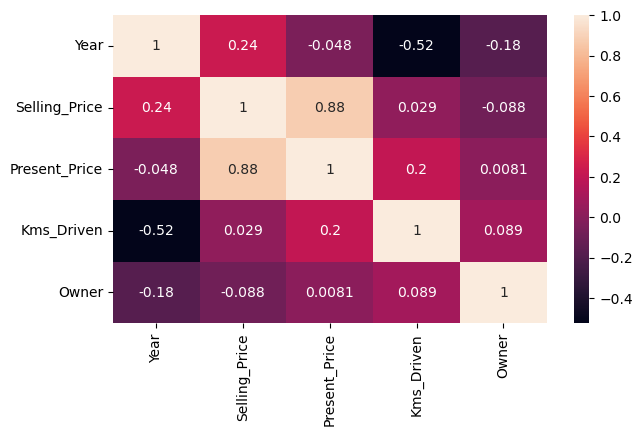

In [7]:
sns.heatmap(df.corr(), annot=True)
plt.show()

In [8]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [9]:
df["vehicle_age"]=2022-df.Year

In [10]:
df.Car_Name.value_counts()

city                         26
corolla altis                16
verna                        14
fortuner                     11
brio                         10
ciaz                          9
innova                        9
i20                           9
grand i10                     8
jazz                          7
amaze                         7
Royal Enfield Classic 350     7
ertiga                        6
eon                           6
sx4                           6
alto k10                      5
i10                           5
swift                         5
Bajaj Pulsar 150              4
Royal Enfield Thunder 350     4
ritz                          4
wagon r                       4
etios liva                    4
dzire                         4
xcent                         3
etios cross                   3
Royal Enfield Thunder 500     3
TVS Apache RTR 160            3
Yamaha FZ S V 2.0             3
creta                         3
Honda CB Hornet 160R          3
etios g 

In [11]:
df.drop(columns=["Car_Name", "Year"], inplace=True)

In [12]:
df.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


<AxesSubplot:xlabel='Selling_Price', ylabel='Count'>

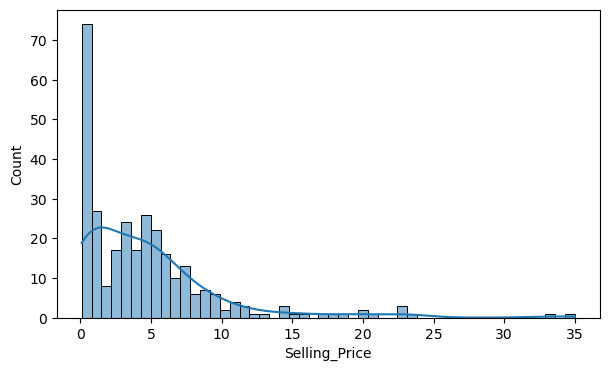

In [13]:
sns.histplot(df.Selling_Price, bins=50, kde=True)

<AxesSubplot:xlabel='Selling_Price'>

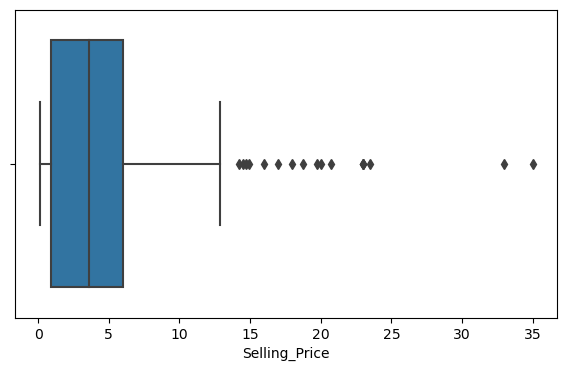

In [14]:
sns.boxplot(df.Selling_Price)

## Train test split

In [15]:
from sklearn.preprocessing import OrdinalEncoder

In [16]:
df_new = df[df.Selling_Price < 10]
df_new.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,8
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,9
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,5
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,11
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,8


In [17]:
X=df_new.drop("Selling_Price", axis=1)
y=df_new.Selling_Price

In [18]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2, random_state=5)

print("Train features shape : ", X_train.shape)
print("Train target shape   : ", y_train.shape)
print("Test features shape  : ", X_test.shape)
print("Test target shape    : ", y_test.shape)


Train features shape :  (218, 7)
Train target shape   :  (218,)
Test features shape  :  (55, 7)
Test target shape    :  (55,)


## Modeling with Pipeline for Adaboost Regressor

In [19]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [20]:
def train_val(model, X_train, y_train, X_test, y_test):
    
    y_pred = model.predict(X_test)
    y_train_pred = model.predict(X_train)
    
    scores = {"train": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [21]:
cat = X.select_dtypes("object").columns
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OrdinalEncoder


ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

In [23]:
from sklearn.pipeline import Pipeline
from sklearn.ensemble import AdaBoostRegressor

#base_estimator=DecisionTreeRegressor(max_depth=3)
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# adaboostregressor algoritması default olarak base_estimator=DecisionTreeRegressor(max_depth=3) kullanır.

# adaboostregressor'de  her agacın bulduğu predictionlar ağırlıklandırılarak tahmin döndürülür.

# örnek verecek olursak prediction için bir gözlemi modele veriyoruz;
# 1. agaç bu gözlemi 5 olarak tahmin etti;
# 2. agaç 7 olarak tahmin etti;
# 3. agaç  9 olarak tahmin etti.

# 1. agacın ağırlığı 2, ikinci agacın ağırlığı 1, üçüncü agacın ağırlığınında 0.5 olduğunu düşenelim.

# hesaplamayı yaparken ağırlıkları dikkate alarak aşağıdaki gibi yapar:
# pred = (1. agacın tahmini x 1. agacın ağırlığı + 2. agacın tahmini x 2. agacın ağırlığı + 
# 3. agacın tahmini x 3. agacın ağırlığı) / (1. agacın ağırlığı + 2. agacın ağırlığı + 3. agacın ağırlığı)
# (5x2 + 7x1 + 9x0.5) / (2 + 1 + 0.5) = 6.14

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model', AdaBoostRegressor(random_state=101))])

In [45]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

# overfiting var görünüyor. CV ile teyit edeceğiz.

,train,test
R2,0.964561,0.940299
mae,0.398220,0.465329
mse,0.255709,0.407881
rmse,0.505677,0.638655


In [46]:
y_pred_ada = pipe_model.predict(X_test)
y_pred_ada

array([0.75      , 5.52419355, 5.66131868, 0.75      , 7.21666667,
       0.51555556, 3.301875  , 4.99878049, 0.75      , 0.76615385,
       5.07      , 4.58529412, 7.8453125 , 4.75      , 4.98421053,
       0.471     , 5.48214286, 5.07      , 7.1       , 0.515     ,
       0.69772727, 2.9       , 4.89633333, 0.73166667, 3.03209302,
       0.51555556, 1.278     , 1.121875  , 0.73166667, 1.15714286,
       0.49769231, 6.86320755, 0.75      , 0.605     , 4.85694915,
       0.51555556, 7.21666667, 1.2875    , 5.27037037, 4.75      ,
       8.40826087, 4.1375    , 5.07941176, 6.90435484, 6.90435484,
       0.51555556, 1.15714286, 1.35166667, 2.60383333, 1.14166667,
       5.66267442, 1.278     , 4.90863636, 3.275     , 3.62363636])

In [24]:
from sklearn.model_selection import cross_validate, cross_val_score

operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10, 
                        return_train_score=True)
pd.DataFrame(scores)
pd.DataFrame(scores).mean()[2:]

# overfiting var.

test_r2                              0.917422
train_r2                             0.963272
test_neg_mean_absolute_error        -0.520943
train_neg_mean_absolute_error       -0.393707
test_neg_mean_squared_error         -0.540584
train_neg_mean_squared_error        -0.265154
test_neg_root_mean_squared_error    -0.714772
train_neg_root_mean_squared_error   -0.513041
dtype: float64

## Gridsearch for Adaboosting

In [25]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor

In [49]:
param_grid = {"Ada_model__n_estimators":[50,150],
              "Ada_model__learning_rate":[0.1, 0.5, 0.8, 1],
              "Ada_model__loss": ["linear", "square"]
            }

# classificationdan farklı olarak base_estimator=DecisionTreeRegressor(max_depth=3)'dür. classificitinda max_dept=1'di.
# loss ağaç ağırlıklarının hesaplanması için kullanılacak loss functiona belirtir. Defaultu linear'dir. En iyi loss function
# Gridsearch ile tespit edilmeli.
# yaprakların bölünme şartı için classificationda gini regressionda mse dikkate alınır.

In [50]:
base_estimator=DecisionTreeRegressor(max_depth=2)

operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(base_estimator=base_estimator, 
                                                                                random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

# overfitingi gidermek için base estimator hyperparametreleriylede oynanabilir. Burda base estimatordaki max_depth=2 olarak
# düzenledik overfitingi giderdik

In [51]:
grid_model.fit(X_train,y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('Ada_model',
                                        AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                                                          random_state=101))]),
             n_jobs=-1,
             param_grid={'Ada_model__learning_rate': [0.1, 0.5, 0.8, 1],
                         'Ada_model__loss': ['linear', 'square'],
                         'Ada_model__n_estimators': [50, 150]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [52]:
grid_model.best_params_

{'Ada_model__learning_rate': 1,
 'Ada_model__loss': 'square',
 'Ada_model__n_estimators': 150}

In [53]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                                   learning_rate=1, loss='square',
                                   n_estimators=150, random_state=101))])

In [54]:
index = grid_model.best_index_
index

15

In [55]:
pd.DataFrame(grid_model.cv_results_).loc[index, ["mean_test_score", "mean_train_score"]]

mean_test_score    -0.757951
mean_train_score   -0.702549
Name: 15, dtype: object

In [56]:
grid_model.best_score_

-0.7579512177780685

In [57]:
prediction = grid_model.predict(X_test)

ada_rmse = np.sqrt(mean_squared_error(y_test, prediction))


train_val(grid_model, X_train, y_train, X_test, y_test)

# CV ve test seti rmse skorları çok tutarlı.

,train,test
R2,0.930344,0.911112
mae,0.544146,0.574516
mse,0.502608,0.607285
rmse,0.708949,0.779285


## Feature importance

In [58]:
features = pipe_model["OrdinalEncoder"].get_feature_names_out()
features

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__vehicle_age'], dtype=object)

In [59]:
new_features = [i.replace("ordinalencoder__","").replace("remainder__", "") for i in features]
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [60]:
operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(base_estimator=base_estimator, loss='square',
                                                                                n_estimators=150, random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                                   loss='square', n_estimators=150,
                                   random_state=101))])

In [61]:
pipe_model["Ada_model"].feature_importances_

array([9.88795547e-02, 2.16275857e-03, 2.93100722e-02, 6.13593588e-01,
       1.07423290e-01, 2.76046089e-06, 1.48627976e-01])

In [62]:
imp_feats = pd.DataFrame(data=pipe_model["Ada_model"].feature_importances_,columns=['ada_Importance'], index=new_features)
ada_imp_feats = imp_feats.sort_values('ada_Importance', ascending=False)
ada_imp_feats

,ada_Importance
Present_Price,0.613594
vehicle_age,0.148628
Kms_Driven,0.107423
Fuel_Type,0.098880
Transmission,0.029310
Seller_Type,0.002163
Owner,0.000003


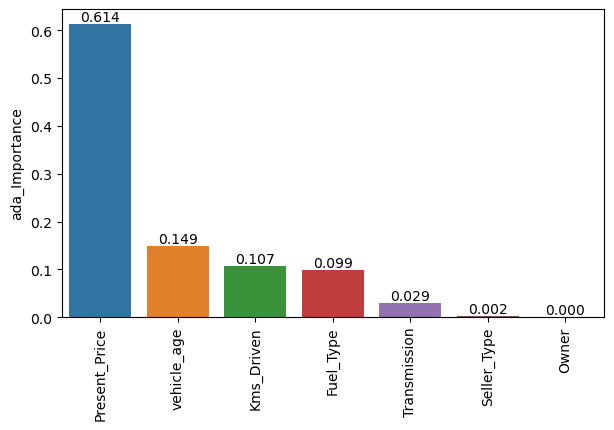

In [63]:
ax = sns.barplot(data=ada_imp_feats, x=ada_imp_feats.index, y='ada_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for Gradient Boosting Regressor

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model', GradientBoostingRegressor(random_state=101))])

In [65]:
# 100 -- 150 -- (-50) -- (-30) --> 150 + 0.1 * (-50) + 0.1*(-30)

# 200 -- 150 -- (50) -- (25)  --> 150 + 0.1 * 50 + 0.1*25

# Regression problemlerinde datadaki tüm gözlemlerin ortalaması alınır. Bu sabit değerler ile gerçek değerler arasındaki 
# fark (resudualler) hesaplanır. Ve model bu residualleri 0'a yakınsatmaya çalışır. 

# clasificationda olduğu gibi her agaçta hesaplanan residual değeri ile learning rate çarpılıp başlangıç değerine ilave edilerek
# tahmin yapılacak.

# yukardaki örnekte datamda 2 örnek olduğunu varsayalım. ilk araba 100 TL iken ikinci araba 200 TL diyelim. Tüm arabaların
# ortalama değeri arabaların başlangıç değeri olacak. Ve heragaçta bulunan değerler bu başlangıç değeriene ilave edilecek.

In [66]:
train_val(pipe_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.992788,0.952247
mae,0.165700,0.353392
mse,0.052040,0.326246
rmse,0.228124,0.571180


In [67]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)
scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)

pd.DataFrame(scores).mean()[2:]

test_r2                              0.948530
train_r2                             0.993220
test_neg_mean_absolute_error        -0.392116
train_neg_mean_absolute_error       -0.158545
test_neg_mean_squared_error         -0.336418
train_neg_mean_squared_error        -0.048881
test_neg_root_mean_squared_error    -0.561606
train_neg_root_mean_squared_error   -0.220971
dtype: float64

## Gridsearch for Gradientboosting

In [68]:
param_grid = {"GB_model__n_estimators":[30,35], 
              "GB_model__subsample":[0.8, 1], 
              "GB_model__max_features" : [5,6],
              "GB_model__learning_rate": [0.02, 0.045], 
              'GB_model__max_depth':[1,2],
              'GB_model__min_samples_split':[2,3],
              'GB_model__min_samples_leaf':[1,2]}

# classificationdan en önemli farkı loss='squared_error'dür. Classifciationda bu logloss'tu hatırlarsanız.

In [69]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [70]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('GB_model',
                                        GradientBoostingRegressor(random_state=101))]),
             n_jobs=-1,
             param_grid={'GB_model__learning_rate': [0.02, 0.045],
                         'GB_model__max_depth': [1, 2],
                         'GB_model__max_features': [5, 6],
                         'GB_model__min_samples_leaf': [1, 2],
                         'GB_model__min_samples_split': [2, 3],
                         'GB_model__n_estimators': [30, 35],
                         'GB_model__subsample': [0.8, 1]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [71]:
grid_model.best_params_

{'GB_model__learning_rate': 0.045,
 'GB_model__max_depth': 2,
 'GB_model__max_features': 6,
 'GB_model__min_samples_leaf': 2,
 'GB_model__min_samples_split': 2,
 'GB_model__n_estimators': 35,
 'GB_model__subsample': 0.8}

In [72]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_depth=2,
                                           max_features=6, min_samples_leaf=2,
                                           n_estimators=35, random_state=101,
                                           subsample=0.8))])

In [73]:
index = grid_model.best_index_
index

122

In [74]:
pd.DataFrame(grid_model.cv_results_).loc[index, ["mean_test_score", "mean_train_score"]]

mean_test_score     -1.08179
mean_train_score   -1.037296
Name: 122, dtype: object

In [75]:
grid_model.best_score_

-1.081789699826103

In [56]:
prediction = grid_model.predict(X_test)

gradient_rmse = np.sqrt(mean_squared_error(y_test, prediction))

train_val(grid_model, X_train, y_train, X_test, y_test)

,train,test
R2,0.849037,0.877428
mae,0.767618,0.769912
mse,1.089277,0.837416
rmse,1.043684,0.915105


In [76]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(learning_rate=0.045, max_depth=2, 
                                                                                       max_features=6, n_estimators=35, 
                                                                                       random_state=101, subsample=0.8,
                                                                                       min_samples_leaf=2))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)
pd.DataFrame(scores).mean()[2:]

test_r2                              0.832959
train_r2                             0.850787
test_neg_mean_absolute_error        -0.812487
train_neg_mean_absolute_error       -0.767679
test_neg_mean_squared_error         -1.221213
train_neg_mean_squared_error        -1.076396
test_neg_root_mean_squared_error    -1.081790
train_neg_root_mean_squared_error   -1.037296
dtype: float64

## Feature importance

In [77]:
operations = [("OrdinalEncoder", column_trans), ("GB_model", GradientBoostingRegressor(learning_rate=0.045, max_depth=2, 
                                                                                       max_features=6, n_estimators=35, 
                                                                                       random_state=101, subsample=0.8,
                                                                                       min_samples_leaf=2))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('GB_model',
                 GradientBoostingRegressor(learning_rate=0.045, max_depth=2,
                                           max_features=6, min_samples_leaf=2,
                                           n_estimators=35, random_state=101,
                                           subsample=0.8))])

In [78]:
pipe_model["GB_model"].feature_importances_

array([0.        , 0.25736683, 0.        , 0.62505946, 0.01989459,
       0.        , 0.09767912])

In [79]:
imp_feats = pd.DataFrame(data=pipe_model["GB_model"].feature_importances_,columns=['grad_Importance'], index=new_features)
grad_imp_feats = imp_feats.sort_values('grad_Importance', ascending=False)
grad_imp_feats

,grad_Importance
Present_Price,0.625059
Seller_Type,0.257367
vehicle_age,0.097679
Kms_Driven,0.019895
Fuel_Type,0.000000
Transmission,0.000000
Owner,0.000000


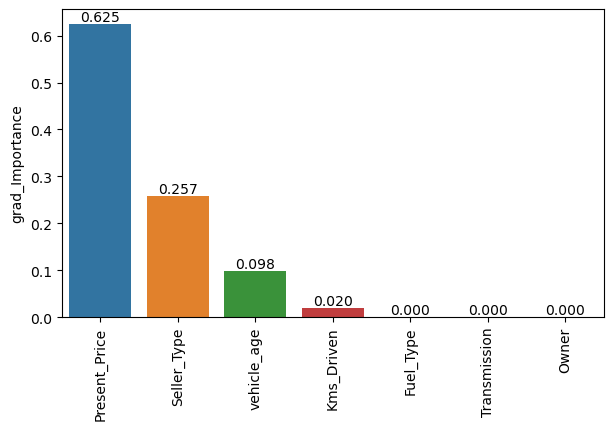

In [80]:

ax = sns.barplot(data=grad_imp_feats, x=grad_imp_feats.index, y='grad_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Modeling with Pipeline for XG Boost Regressor

In [26]:
import xgboost as xgb

xgb.__version__

'0.90'

In [27]:
from xgboost import XGBRegressor

operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

# classificationda objective='binary:logistic' iken regressionda 'reg:squarederror'dür. 
# diğer parametreler classificitonla aynıdır.

[17:19:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model', XGBRegressor(random_state=101))])

In [28]:
train_val(pipe_model, X_train, y_train, X_test, y_test)
#overfitting gibi duruyor

,train,test
R2,0.989754,0.948665
mae,0.194120,0.362543
mse,0.073932,0.350723
rmse,0.271904,0.592218


In [29]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train, scoring=['r2', 
            'neg_mean_absolute_error','neg_mean_squared_error','neg_root_mean_squared_error'], cv =10,
                       return_train_score=True)
pd.DataFrame(scores).iloc[:, 2:].mean()

# overfiting var.

[17:19:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[17:19:24] WARNI

test_r2                              0.945076
train_r2                             0.990938
test_neg_mean_absolute_error        -0.404309
train_neg_mean_absolute_error       -0.181499
test_neg_mean_squared_error         -0.363264
train_neg_mean_squared_error        -0.065372
test_neg_root_mean_squared_error    -0.587531
train_neg_root_mean_squared_error   -0.255247
dtype: float64

## Gridsearch for XGBoost

In [85]:
param_grid = {"XGB_model__n_estimators":[30,35],
              "XGB_model__max_depth":[2,3], 
              "XGB_model__learning_rate": [0.055, 0.06],
              "XGB_model__subsample": [0.5, 0.8], #datanın ne kadarını kullanıyorum
              "XGB_model__colsample_bytree":[0.5, 0.8, 1],#her bir yapraktak feature sayısı
              "XGB_model__colsample_bylevel":[0.5, 0.8, 1],
             
              }

In [86]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(random_state=101))]

model = Pipeline(steps=operations)

grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='neg_root_mean_squared_error',
                          cv=10,
                          n_jobs = -1,
                          return_train_score=True)

In [87]:
grid_model.fit(X_train, y_train)

GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('OrdinalEncoder',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('ordinalencoder',
                                                                         OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                                        unknown_value=-1),
                                                                         Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                                       ('XGB_model',
                                        XGBRegressor(base_score=None,
                                                     booster=None,
                                                     colsample_bylevel=Non...
                                                     validate_parameters=None,
                                                     verbosity=None))]),
             n_jobs=-1,
             param_grid={'XGB_model__colsample_bylevel': [0.5, 0.8, 1],
                         'XGB_model__colsample_bytree': [0.5, 0.8, 1],
                         'XGB_model__learning_rate': [0.055, 0.06],
                         'XGB_model__max_depth': [2, 3],
                         'XGB_model__n_estimators': [30, 35],
                         'XGB_model__subsample': [0.5, 0.8]},
             return_train_score=True, scoring='neg_root_mean_squared_error')

In [88]:
grid_model.best_params_

{'XGB_model__colsample_bylevel': 1,
 'XGB_model__colsample_bytree': 1,
 'XGB_model__learning_rate': 0.06,
 'XGB_model__max_depth': 3,
 'XGB_model__n_estimators': 35,
 'XGB_model__subsample': 0.5}

In [89]:
grid_model.best_estimator_

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsampl...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.06,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=35, n_jobs=16, num_parallel_tree=1,
                              predictor='auto', random_state=101, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [90]:
index = grid_model.best_index_
index

142

In [91]:
pd.DataFrame(grid_model.cv_results_).loc[index, ["mean_test_score", "mean_train_score"]]

# overfiting olmadığını gördük.

mean_test_score    -0.887809
mean_train_score   -0.800187
Name: 142, dtype: object

In [92]:
grid_model.best_score_

-0.8878094215358905

In [93]:
prediction = grid_model.predict(X_test)

xgb_rmse = np.sqrt(mean_squared_error(y_test, prediction))

train_val(grid_model, X_train, y_train, X_test, y_test)
# test datası ile CV'dan aldığımız validtion seti scorlarının ortalaması tutarlı olmadığından bu modeli
# onaylamıyoruz. 

,train,test
R2,0.914400,0.928814
mae,0.494204,0.491760
mse,0.617648,0.486346
rmse,0.785906,0.697385


## Feature importance

In [75]:
operations = [("OrdinalEncoder", column_trans), ("XGB_model", XGBRegressor(n_estimators=35, learning_rate=0.06, max_depth=3, 
                                                                           random_state=101, subsample=0.5))]

pipe_model = Pipeline(steps=operations)

pipe_model.fit(X_train, y_train)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('XGB_model',
                 XGBRegressor(base_score=0.5, booster='gbtree',
                              colsample_bylevel=1, colsample_bynode=1,
                              colsampl...
                              gamma=0, gpu_id=-1, importance_type=None,
                              interaction_constraints='', learning_rate=0.06,
                              max_delta_step=0, max_depth=3, min_child_weight=1,
                              missing=nan, monotone_constraints='()',
                              n_estimators=35, n_jobs=8, num_parallel_tree=1,
                              predictor='auto', random_state=101, reg_alpha=0,
                              reg_lambda=1, scale_pos_weight=1, subsample=0.5,
                              tree_method='exact', validate_parameters=1,
                              verbosity=None))])

In [76]:
pipe_model["XGB_model"].feature_importances_

array([0.08241928, 0.20628504, 0.0428144 , 0.5046994 , 0.05548918,
       0.        , 0.10829269], dtype=float32)

In [77]:
pipe_model["OrdinalEncoder"].get_feature_names_out()

array(['ordinalencoder__Fuel_Type', 'ordinalencoder__Seller_Type',
       'ordinalencoder__Transmission', 'remainder__Present_Price',
       'remainder__Kms_Driven', 'remainder__Owner',
       'remainder__vehicle_age'], dtype=object)

In [78]:
new_features

['Fuel_Type',
 'Seller_Type',
 'Transmission',
 'Present_Price',
 'Kms_Driven',
 'Owner',
 'vehicle_age']

In [79]:
imp_feats = pd.DataFrame(data=pipe_model["XGB_model"].feature_importances_, columns=['xgb_Importance'], index=new_features)
xgb_imp_feats = imp_feats.sort_values('xgb_Importance', ascending=False)
xgb_imp_feats

,xgb_Importance
Present_Price,0.504699
Seller_Type,0.206285
vehicle_age,0.108293
Fuel_Type,0.082419
Kms_Driven,0.055489
Transmission,0.042814
Owner,0.000000


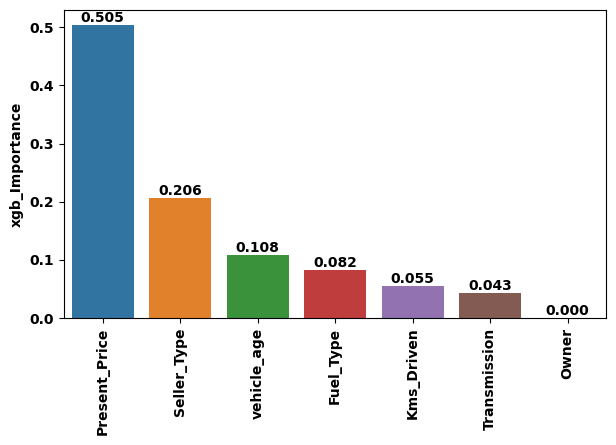

In [80]:
ax = sns.barplot(data=xgb_imp_feats, x=xgb_imp_feats.index, y='xgb_Importance')
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.xticks(rotation=90);

## Feature importance comparison

In [81]:
pd.concat([xgb_imp_feats, grad_imp_feats, ada_imp_feats], axis=1)

,xgb_Importance,grad_Importance,ada_Importance
Present_Price,0.504699,0.625059,0.613594
Seller_Type,0.206285,0.257367,0.002163
vehicle_age,0.108293,0.097679,0.148628
Fuel_Type,0.082419,0.000000,0.098880
Kms_Driven,0.055489,0.019895,0.107423
Transmission,0.042814,0.000000,0.029310
Owner,0.000000,0.000000,0.000003


## compare scores

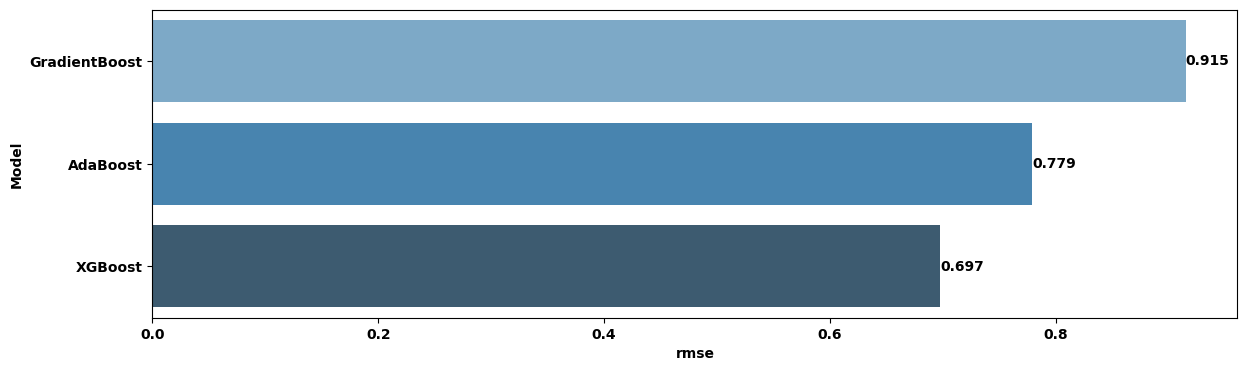

In [82]:
compare = pd.DataFrame({"Model": ["AdaBoost","GradientBoost", "XGBoost"],
                        "rmse": [ada_rmse, gradient_rmse, xgb_rmse]})
   
plt.figure(figsize=(14,4))

compare = compare.sort_values(by="rmse", ascending=False)
ax=sns.barplot(x="rmse", y="Model", data=compare, palette="Blues_d")
ax.bar_label(ax.containers[0],fmt="%.3f")
plt.show();

In [83]:
# Yukardaki rmse skorlarına göre XGBoost en düşük skor görünse de CV'da alınan skorlara göre tutarlı değildir. CV ile
# en tutarlı skoru adaboost verdiği için adaboost'u tercih ediyoruz.

## Final Model

In [94]:
cat

Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object')

In [95]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.compose import make_column_transformer

ord_enc = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)

column_trans = make_column_transformer((ord_enc, cat), remainder='passthrough')

base_estimator=DecisionTreeRegressor(max_depth=2)

operations = [("OrdinalEncoder", column_trans), ("Ada_model", AdaBoostRegressor(base_estimator=base_estimator, loss='square',
                                                                                n_estimators=150, random_state=101))]

pipe_model = Pipeline(steps=operations)
pipe_model.fit(X, y)

Pipeline(steps=[('OrdinalEncoder',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ordinalencoder',
                                                  OrdinalEncoder(handle_unknown='use_encoded_value',
                                                                 unknown_value=-1),
                                                  Index(['Fuel_Type', 'Seller_Type', 'Transmission'], dtype='object'))])),
                ('Ada_model',
                 AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=2),
                                   loss='square', n_estimators=150,
                                   random_state=101))])

In [96]:
pd.DataFrame(column_trans.fit_transform(X)).head()

,0,1,2,3,4,5,6
0,2.0,0.0,1.0,5.59,27000.0,0.0,8.0
1,1.0,0.0,1.0,9.54,43000.0,0.0,9.0
2,2.0,0.0,1.0,9.85,6900.0,0.0,5.0
3,2.0,0.0,1.0,4.15,5200.0,0.0,11.0
4,1.0,0.0,1.0,6.87,42450.0,0.0,8.0


## Prediction

In [97]:
samples = {"Present_Price": [7, 9.5],
           "Kms_Driven": [25000, 44000],
           "Fuel_Type":["Petrol", "Diesel"],
           'Seller_Type':['Dealer', 'Individual'],
           'Transmission': ['Manual', 'Automatic'],
           "Owner":[0,1],
           "vehicle_age":[1, 9]}

In [98]:
df_samples = pd.DataFrame(samples)
df_samples

,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,vehicle_age
0,7.0,25000,Petrol,Dealer,Manual,0,1
1,9.5,44000,Diesel,Individual,Automatic,1,9


In [99]:
pipe_model.predict(df_samples)

array([5.73593023, 5.1265812 ])